# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





In [ ]:
from sympy import *
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [ ]:
# set up the printing for nice formatting
init_printing()

In [ ]:
# define the symbol for x
x = Symbol('x')

In [ ]:
# define the given function
f = Function('f')
fx = 3 * x ** 2 + 2 * x + 2
Eq(f(x), fx)

#### Result for Task 2a-1

In [ ]:
# integrate the function
Eq(Integral(fx, x), integrate(fx, x))

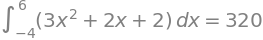

In [ ]:
# get exact value for integration from x = -4 to x = 6
true_result = integrate(fx, (x, -4, 6))
Eq(Integral(fx, (x, -4, 6)), true_result)

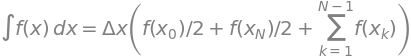

In [ ]:
# trapezoidal rule for integral approximation
Eq(Integral(f(x), x), Symbol('Delta') * x * Add(Sum(f(Symbol('x_k')), (Symbol('k'), 1, Symbol('N') - 1)) + (Add(f(Symbol('x_N')) + f(Symbol('x_0'))))/2), evaluate=False)

In [ ]:
# use lambdify to redefine the function so it can be evaluated 
# over a range of values
fx = lambdify([x], 3 * x ** 2 + 2 * x + 2, 'numpy')

In [ ]:
# values of n to be used for calculations using trapezoid rule
n_list = [10, 20, 40, 80, 160, 320, 640, 1280]

# constant values
a, b = -4, 6

# list to hold the integral estimations for each value of n
results = []

for n in n_list:
    # the change in x from x_k to x_k+1
    # the greater the value of n, the smaller the subdivisions
    #  between a and b
    delta_x = (b - a) / n

    # values of x_N and x_0 to use in the calculation
    xN = b 
    x0 = a
    
    # the summation in the formula starts with x_1 and stops 
    #   at x_N-1
    # x_1 = x_0 + delta_x
    x_curr = x0 + delta_x

    # carry out the summation
    total = 0 
    for i in range(1, n):
        total += fx(x_curr)
        x_curr += delta_x 
    
    total += (fx(xN) + fx(x0)) / 2

    # multiply the current total by delta_x
    total = total * delta_x

    results.append(total)


#### Result for Task 2a-2

In [ ]:
print('N:\t\t|  Trapezoid Rule Estimation:')
print('_'*43)
for i, n in enumerate(n_list):
    print(n, '\t\t| ', results[i])

N:		|  Trapezoid Rule Estimation:
___________________________________________
10 		|  325.0
20 		|  321.25
40 		|  320.3125
80 		|  320.078125
160 		|  320.01953125
320 		|  320.0048828125
640 		|  320.001220703125
1280 		|  320.00030517578125


In [ ]:
# calculate the absolute error from the true integral value for 
# each value of N

def abs_val(x: float) -> float: 
    # returns the absolute value of the input x
    return x if x > 0 else -1 * x 

errors = [abs_val(result - true_result) for result in results] 

print('N:\t\t|  Absolute Error:')
print('_'*40)
for i, n in enumerate(n_list):
    print(n, '\t\t| ', str(errors[i]).rstrip('0').rstrip('.'))

N:		|  Absolute Error:
________________________________________
10 		|  5
20 		|  1.25
40 		|  0.3125
80 		|  0.078125
160 		|  0.01953125
320 		|  0.0048828125
640 		|  0.001220703125
1280 		|  0.00030517578125


#### Result for Task 2a-3

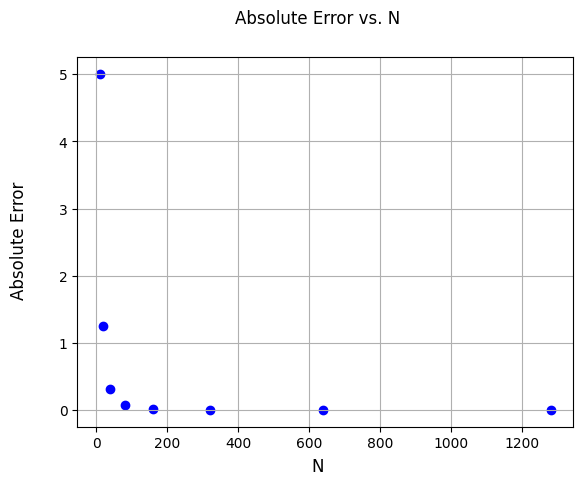

In [ ]:
# plot the absolute error against N
fig, ax = plt.subplots()
fig.suptitle('Absolute Error vs. N')
fig.supxlabel('N')
fig.supylabel('Absolute Error')
ax.grid(True)
ax.scatter(n_list, errors, color='blue')

## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

In [ ]:
y = symbols('y')

# define the function
fxy = (sin(x) ** 2) * (E ** x) * (cos(y))
Eq(f(x, y), fxy)

#### Result for Task 2b-1

In [ ]:
# differentiate f(x,y) with respect to both x and y
dfxy = diff(fxy, x, y)
Eq(Derivative(fxy, x, y), dfxy)

#### Result for Task 2b-2

In [ ]:
true_solution = N(dfxy.subs(x, 2).subs(y, 3), 15)
true_solution

In [ ]:
# lambdified version of the original function
fxyl = lambdify([x, y], fxy, 'numpy')

In [ ]:
# values of h to use for central difference approximation
h_list = [0.1, 0.01, 0.001, 0.0001]

# set values of x and y to calculate
x, y = 2, 3

# list to store the approximations
results_2 = []

# in the central difference approximation formula, we use
#   k = h for simplicity
for h in h_list:
    # calculate each of the 4 terms in the numerator
    term1 = fxyl(x + h, y + h)
    term2 = fxyl(x + h, y - h)
    term3 = fxyl(x - h, y + h)
    term4 = fxyl(x - h, y - h)

    den = 4 * h * h 

    result = (term1 - term2 - term3 + term4) / den 

    results_2.append(result)


#### Result for Task 2b-3

In [ ]:
print('h:\t\t|  Central Difference Approximation:')
print('_'*48)
for i, h in enumerate(h_list):
    print(h, '\t\t| ', results_2[i])

h:		|  Central Difference Approximation:
________________________________________________
0.1 		|  -0.06885821524436063
0.01 		|  -0.07297034655850965
0.001 		|  -0.0730117781788664
0.0001 		|  -0.07301219628885747


In [ ]:
# calculate the absolute error from the true value for 
#   each value of h
errors_2 = [abs_val(result - true_solution) for result in results_2]

print('h:\t\t|  Absolute Error:')
print('_'*40)
for i, h in enumerate(h_list[::-1]):
    print(h, '\t\t| ', str(errors_2[i]).rstrip('0').rstrip('.'))

h:		|  Absolute Error:
________________________________________
0.0001 		|  0.00415398141504557
0.001 		|  4.18501008965511e-5
0.01 		|  4.18480539804422e-7
0.1 		|  3.70548730588283e-1


#### Result for Task 2b-4

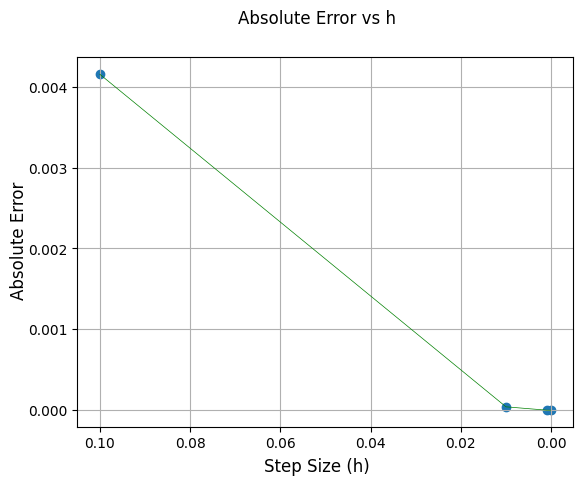

In [ ]:
# plot the absolute error against step size h
fig, ax = plt.subplots()
fig.suptitle('Absolute Error vs h')
fig.supylabel('Absolute Error')
fig.supxlabel('Step Size (h)')
ax.grid(True)
ax.scatter(h_list, errors_2)
ax.plot(h_list, errors_2, linewidth=0.5, color="green")
fig.gca().invert_xaxis()

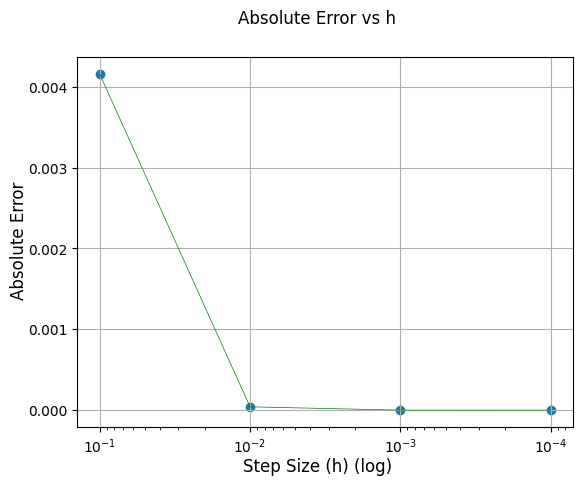

In [ ]:
# same data is plotted, but h is represented with log scale
fig, ax = plt.subplots()
fig.suptitle('Absolute Error vs h')
fig.supylabel('Absolute Error')
fig.supxlabel('Step Size (h) (log)')
ax.grid(True)
ax.set_xscale('log')
ax.scatter(h_list, errors_2)
ax.plot(h_list, errors_2, linewidth=0.5, color="green")
fig.gca().invert_xaxis()

## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [ ]:
# set a seed for reproducibility of random numbers
np.random.seed(595)

# shorthand function to get a random number from 1000 to 10000
def r():
    return np.random.randint(1000, 10000 + 1)

# create a list of dictionaries that will be used to 
# make the DataFrame
dict_list = [ 
    {'Year': 2099, 
     'Hempstead': r(),
     'Babylon': r(), 
     'Islip': r(),
     'Brookhaven': r()},

     {'Year': 2300, 
     'Hempstead': r(),
     'Babylon': r(), 
     'Islip': r(),
     'Brookhaven': r()},

     {'Year': 2400, 
     'Hempstead': r(),
     'Babylon': r(), 
     'Islip': r(),
     'Brookhaven': r()},
]

#### Result of Task 3-1

In [ ]:
# create the DataFrame from the list of dictionaries
df = pd.DataFrame(dict_list)
df

,Year,Hempstead,Babylon,Islip,Brookhaven
0,2099,2931,8043,8414,8661
1,2300,5444,9227,7393,8007
2,2400,1660,7977,4730,2940


In [ ]:
df = df.set_index('Year')
df = df.add_suffix(' Population')
df

,Hempstead Population,Babylon Population,Islip Population,Brookhaven Population
Year,,,,
2099,2931,8043,8414,8661
2300,5444,9227,7393,8007
2400,1660,7977,4730,2940


#### Result of Task 3-2

In [ ]:
# Entire DataFrame
df

,Hempstead Population,Babylon Population,Islip Population,Brookhaven Population
Year,,,,
2099,2931,8043,8414,8661
2300,5444,9227,7393,8007
2400,1660,7977,4730,2940


In [ ]:
# Taking "row #1" to mean the row at index 1:

# Value in row #1, Hempstead
# use 2300 to access row #1 since year is used as the index
df.at[2300, 'Hempstead Population']

5444

In [ ]:
# alternatively
print(df.iloc[1]['Hempstead Population'])
print(df['Hempstead Population'].iloc[1])

5444
5444


#### Result of Task 3-3

In [ ]:
df['Riverhead Population'] = df['Islip Population'] + df['Brookhaven Population']
df

,Hempstead Population,Babylon Population,Islip Population,Brookhaven Population,Riverhead Population
Year,,,,,
2099,2931,8043,8414,8661,17075
2300,5444,9227,7393,8007,15400
2400,1660,7977,4730,2940,7670


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [ ]:
# read in the "customers-100" data into a DataFrame
data = pd.read_csv('data/customers-100.csv')
data.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
1,2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/
2,3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,http://www.lawrence.com/
3,4,5Cef8BFA16c5e3c,Linda,Olsen,"Dominguez, Mcmillan and Donovan",Bensonview,Dominican Republic,001-808-617-6467x12895,+1-813-324-8756,stanleyblackwell@benson.org,2020-06-02,http://www.good-lyons.com/
4,5,053d585Ab6b3159,Joanna,Bender,"Martin, Lang and Andrade",West Priscilla,Slovakia (Slovak Republic),001-234-203-0635x76146,001-199-446-3860x3486,colinalvarado@miles.net,2021-04-17,https://goodwin-ingram.com/


#### Result of Task 4-1

In [ ]:
data = data.sort_values('Last Name')
data = data.set_index('Index')
data.head()

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
Index,,,,,,,,,,,
68,a014Ec1b9FccC1E,Tom,Alvarado,Donaldson-Dougherty,South Sophiaberg,Kiribati,(585)606-2980x2258,730-797-3594x5614,nicholsonnina@montgomery.info,2020-08-18,http://odom-massey.com/
97,CeD220bdAaCfaDf,Lynn,Atkinson,"Ware, Burns and Oneal",New Bradview,Sri Lanka,+1-846-706-2218,605.413.3198,vkemp@ferrell.com,2021-07-10,https://novak-allison.com/
93,aAb6AFc7AfD0fF3,Collin,Ayers,Lamb-Peterson,South Lonnie,Anguilla,404-645-5351x012,001-257-582-8850x8516,dudleyemily@gonzales.biz,2021-06-29,http://www.ruiz.com/
1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
16,8cad0b4CBceaeec,Miranda,Beasley,Singleton and Sons,Desireeshire,Oman,540.085.3135x185,+1-600-462-6432x21881,vduncan@parks-hardy.com,2022-04-12,http://acosta.org/


#### Result of Task 4-2

In [ ]:
# extract the entries that have a subscription date in 2021
data_2021 = data[data['Subscription Date'].str[:4] == '2021']

# count the number of items in this DataFrame
num_in_2021 = len(data_2021)

print(f'There are {num_in_2021} customers whose subscription dates are in 2021')

There are 43 customers whose subscription dates are in 2021


## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


Fact: LU and PLU decompositions are not unique.

In [ ]:
class InvalidShapeException(Exception):
    "Raised when the dimensions of the input matrix do not match"
    pass 

In [ ]:
class NeedsPivotException(Exception):
    "Raised when the input matrix has zeros in the main diagonal"
    pass 

In [ ]:
def LUdecomposition(A: np.array) -> [np.array, np.array]:
    # takes (n x n) matrix A as an input and returns a list
    # containing the resulting L and U matrices from 
    # the LU decomposition process

    # check if the input array is square shape
    rows, cols = A.shape
    if rows != cols:
        raise InvalidShapeException("Input A is not (n x n)")
    
    # check if there are any 0s present in the main diagonal
    if 0 in A.diagonal():
        raise NeedsPivotException("Pure LU Decomposition does not exist " + 
                                  "for input A. Pivoting is needed.")
    
    U = A.copy()
    L = np.identity(rows)

    return [U, L]

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
l = a.copy()
l[0,0] = 10
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
l

array([[10,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

In [ ]:
LUdecomposition(a)

[array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])]

## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig